# Class Single Recording Code

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 1\nac\n5-240901-064209"
# behavior_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs\n5-240821-085040.csv"
# cup_assignment_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\Social_Pref_sheet.csv"


# single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n5-240821-085040"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
tdt_data.epocs

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 1\nac\n5-240901-064209\Notes.txt
read from t=0s to t=1681.56s


PC0_	[struct]
PC3_	[struct]
Cam1	[struct]
Tick	[struct]

In [4]:
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

tdt_data_obj.behaviors['sound cues'] = tdt_data_obj.behaviors.pop('PC0_')
tdt_data_obj.behaviors['port entries'] = tdt_data_obj.behaviors.pop('PC3_')
tdt_data_obj.behaviors['sound cues'].onset = tdt_data_obj.behaviors['sound cues'].onset[1:]
tdt_data_obj.behaviors['sound cues'].offset = tdt_data_obj.behaviors['sound cues'].offset[1:]
tdt_data_obj.behaviors['port entries'].onset = tdt_data_obj.behaviors['port entries'].onset[1:]
tdt_data_obj.behaviors['port entries'].offset = tdt_data_obj.behaviors['port entries'].offset[1:]

In [13]:
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*3)
tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels()
tdt_data_obj.compute_dFF()
tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
# tdt_data_obj.remove_short_behaviors(behavior_name='all', min_duration=0.5)

tdt_data_obj.compute_zscore()

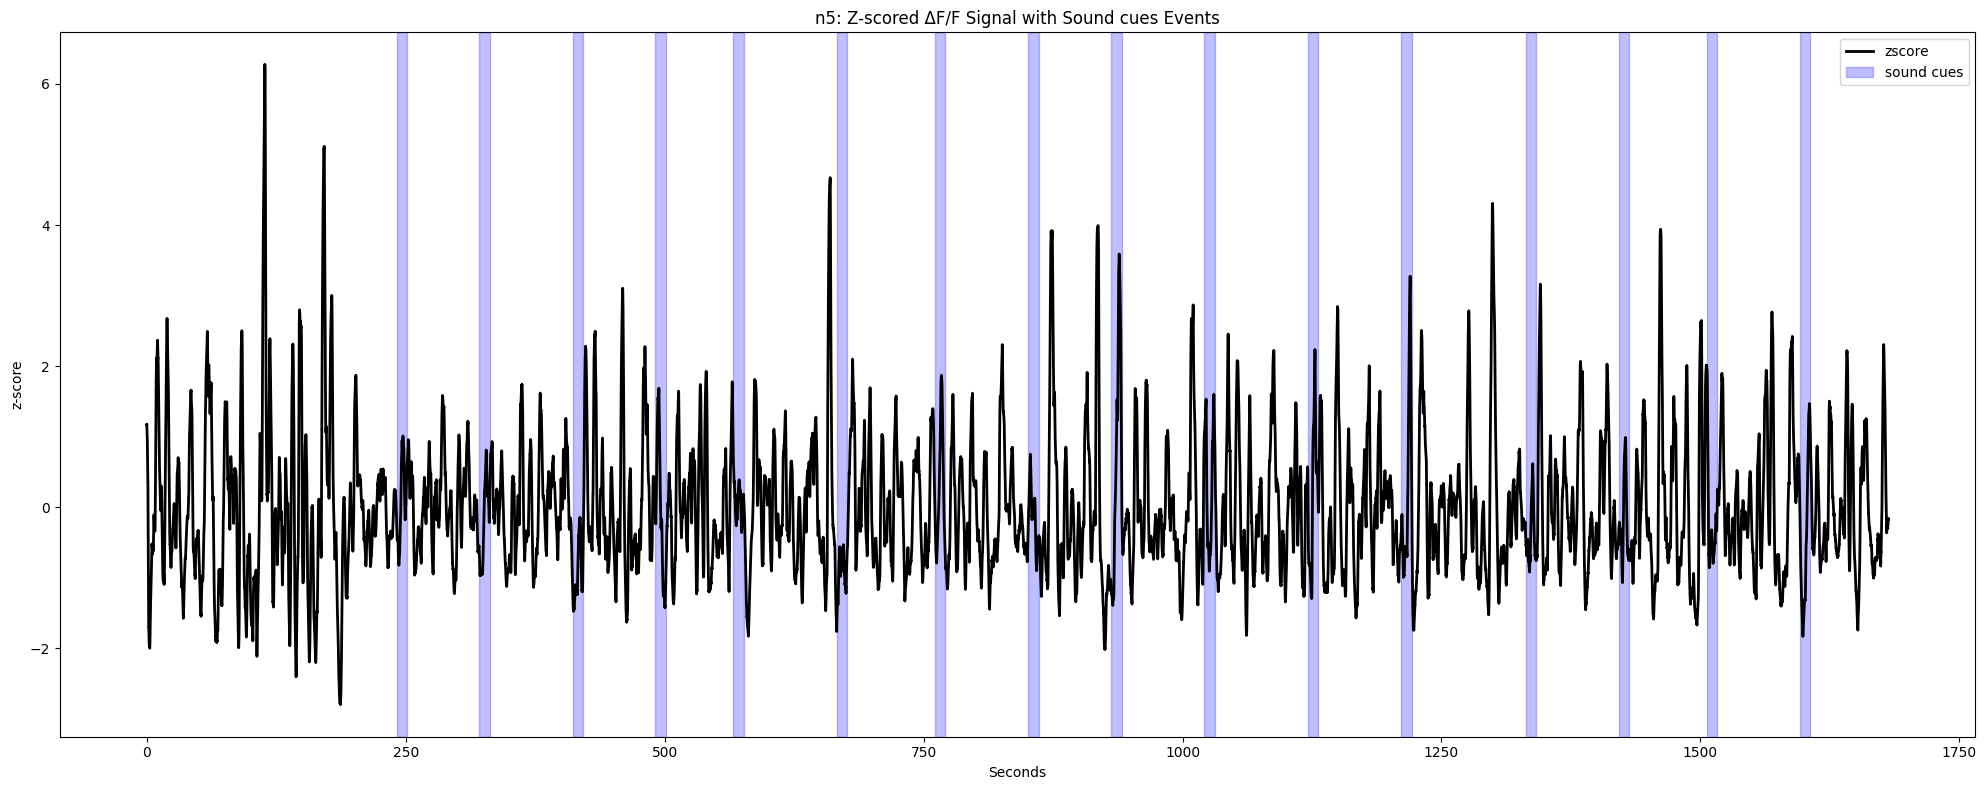

In [14]:
tdt_data_obj.hc_plot_behavior_event(behavior_name='sound cues')

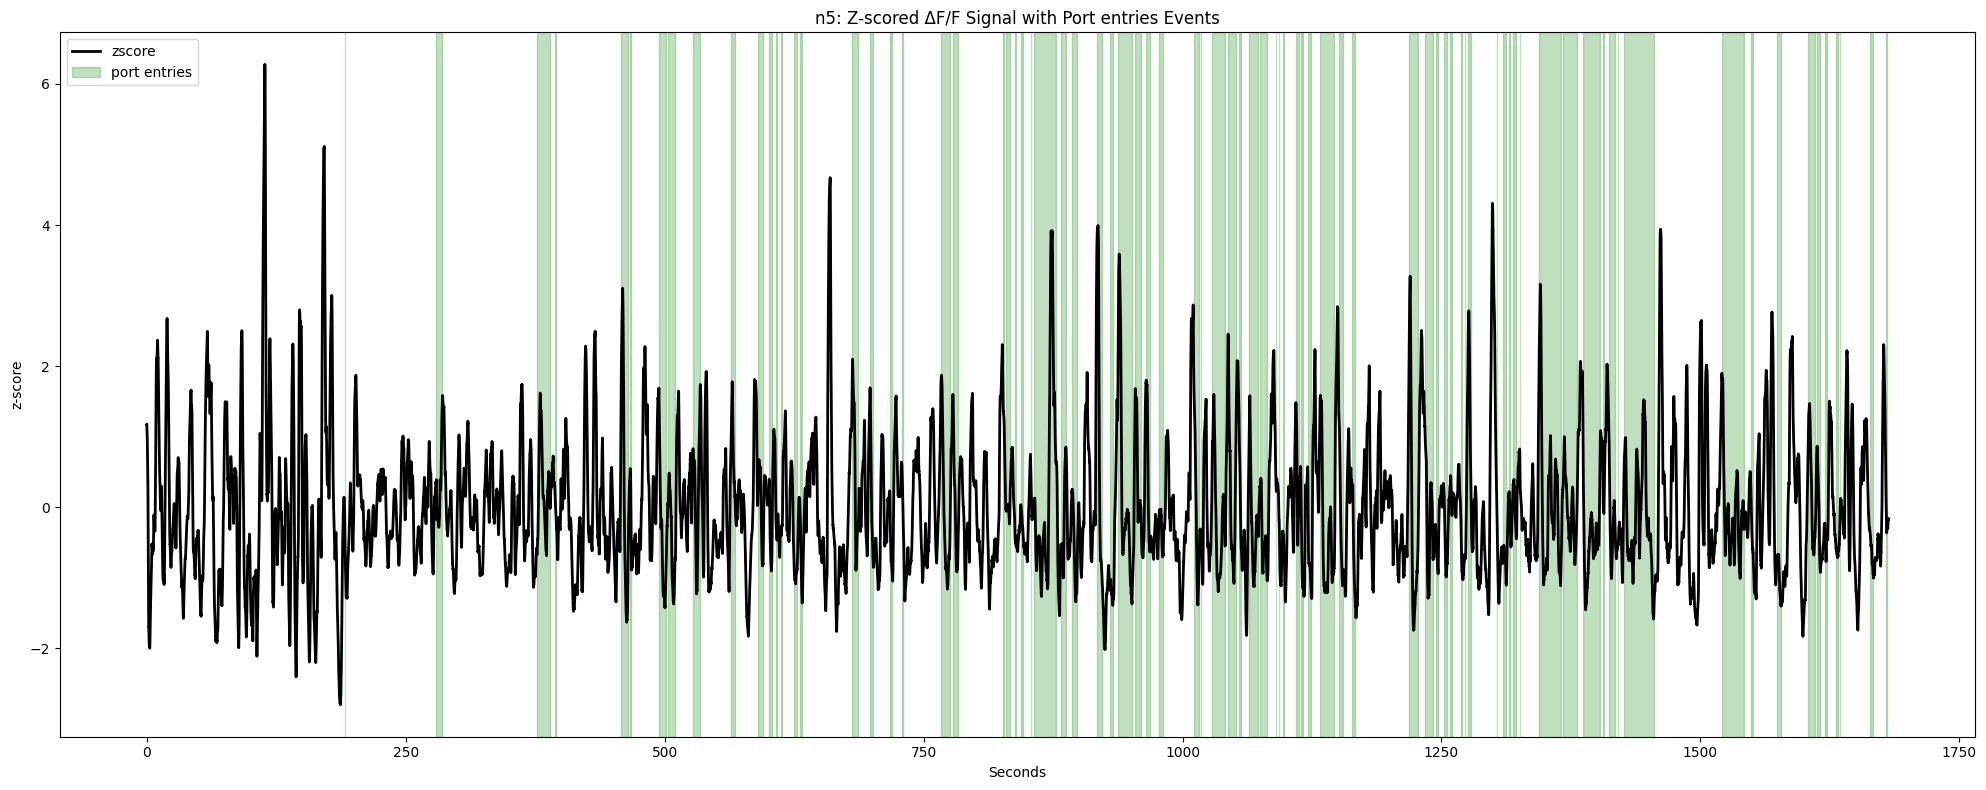

In [15]:
tdt_data_obj.hc_plot_behavior_event(behavior_name='port entries')

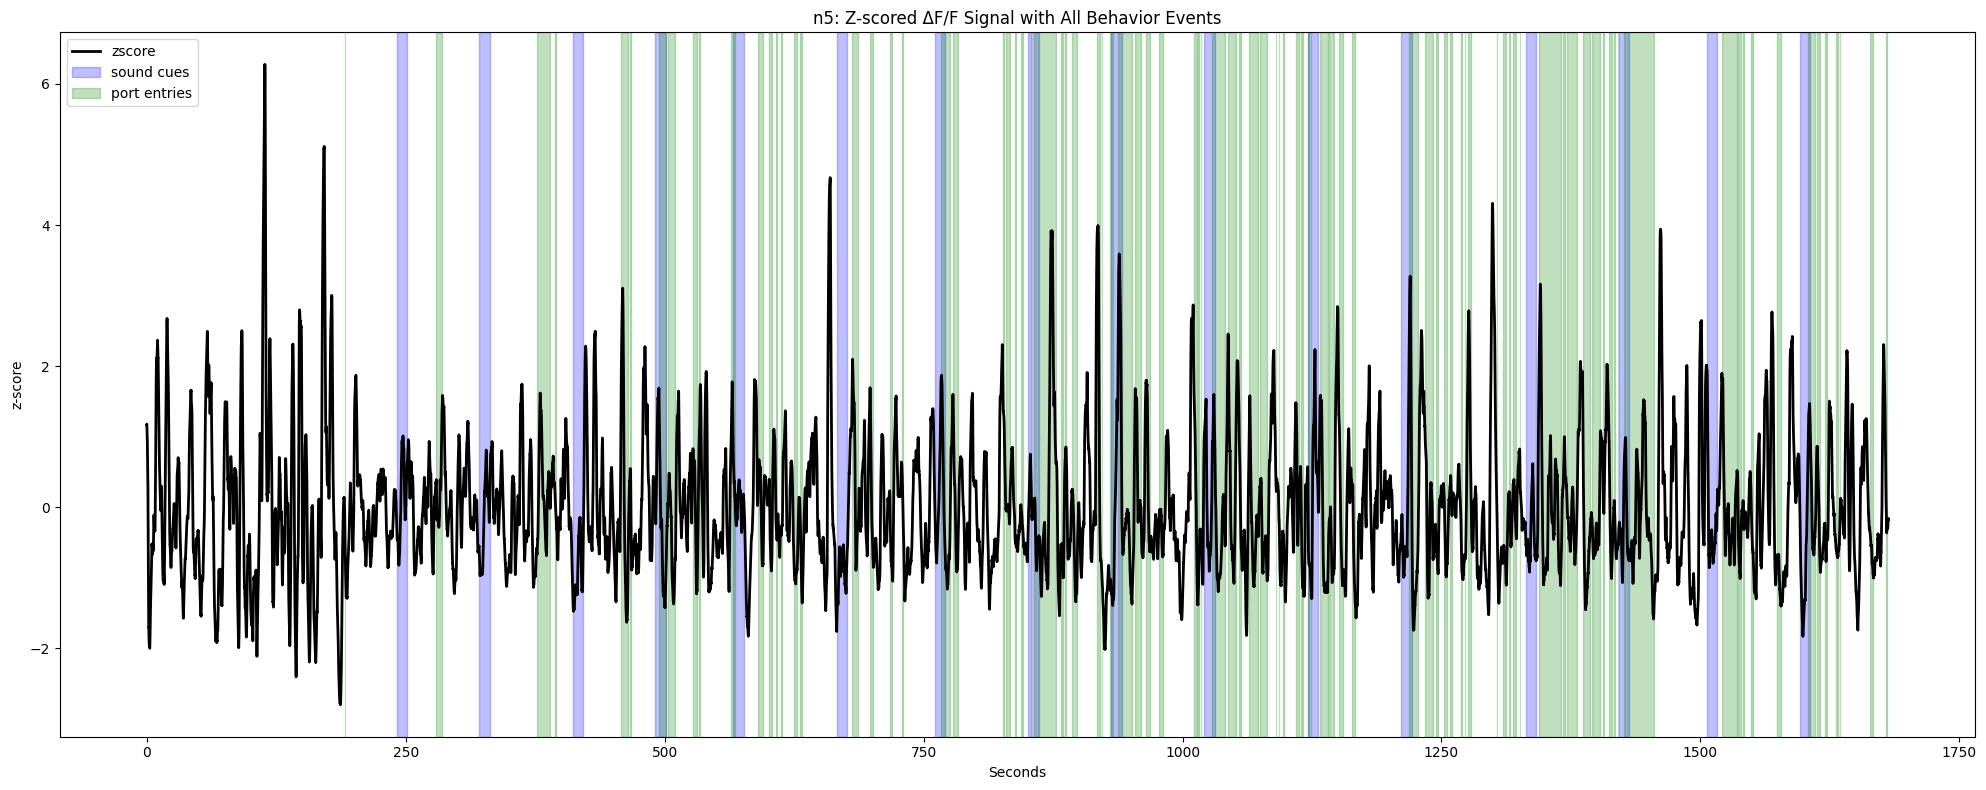

In [12]:
tdt_data_obj.hc_plot_behavior_event()

In [8]:
tdt_data_obj.behaviors['sound cues'].onset 

[np.float64(241.1544576),
 np.float64(321.15474432),
 np.float64(411.15516928),
 np.float64(491.15594752),
 np.float64(566.15616512),
 np.float64(666.15656448),
 np.float64(761.1572224),
 np.float64(851.1578112),
 np.float64(931.15809792),
 np.float64(1021.15868672),
 np.float64(1121.15924992),
 np.float64(1211.15983872),
 np.float64(1331.16051456),
 np.float64(1421.16093952),
 np.float64(1506.1614592),
 np.float64(1596.162048)]

In [9]:
tdt_data_obj.behaviors['sound cues'].offset

[np.float64(251.154432),
 np.float64(331.1550464),
 np.float64(421.15530752),
 np.float64(501.15592192),
 np.float64(576.15630336),
 np.float64(676.15670272),
 np.float64(771.15752448),
 np.float64(861.1577856),
 np.float64(941.15823616),
 np.float64(1031.15882496),
 np.float64(1131.159552),
 np.float64(1221.15981312),
 np.float64(1341.16048896),
 np.float64(1431.16107776),
 np.float64(1516.1614336),
 np.float64(1606.1620224)]

In [10]:
tdt_data_obj.behaviors['port entries'].onset

[np.float64(191.6141568),
 np.float64(279.14452992),
 np.float64(376.72517632),
 np.float64(394.12514816),
 np.float64(457.7755136),
 np.float64(467.00593152),
 np.float64(494.68588032),
 np.float64(503.27584768),
 np.float64(527.57594112),
 np.float64(533.2860928),
 np.float64(564.50613248),
 np.float64(590.49639936),
 np.float64(600.28665856),
 np.float64(607.26624256),
 np.float64(612.73653248),
 np.float64(624.97652736),
 np.float64(630.49662464),
 np.float64(680.91707392),
 np.float64(698.576896),
 np.float64(717.46699264),
 np.float64(729.40716032),
 np.float64(766.89719296),
 np.float64(778.59733504),
 np.float64(827.13772032),
 np.float64(829.91775744),
 np.float64(838.51771904),
 np.float64(844.48772096),
 np.float64(853.44780288),
 np.float64(856.20801536),
 np.float64(882.39816704),
 np.float64(886.05786112),
 np.float64(893.71803648),
 np.float64(917.83839744),
 np.float64(922.07824896),
 np.float64(929.71843584),
 np.float64(937.488384),
 np.float64(954.17843712),
 np.floa

In [11]:
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*3)
tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels()
tdt_data_obj.compute_dFF()
tdt_data_obj.extract_manual_annotation_behaviors(behavior_csv_path)
tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
tdt_data_obj.remove_short_behaviors(behavior_name='all', min_duration=0.5)

tdt_data_obj.compute_zscore()




tdt_data_obj.hab_dishab_extract_intruder_bouts(behavior_csv_path)
tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
tdt_data_obj.get_first_behavior()

NameError: name 'behavior_csv_path' is not defined

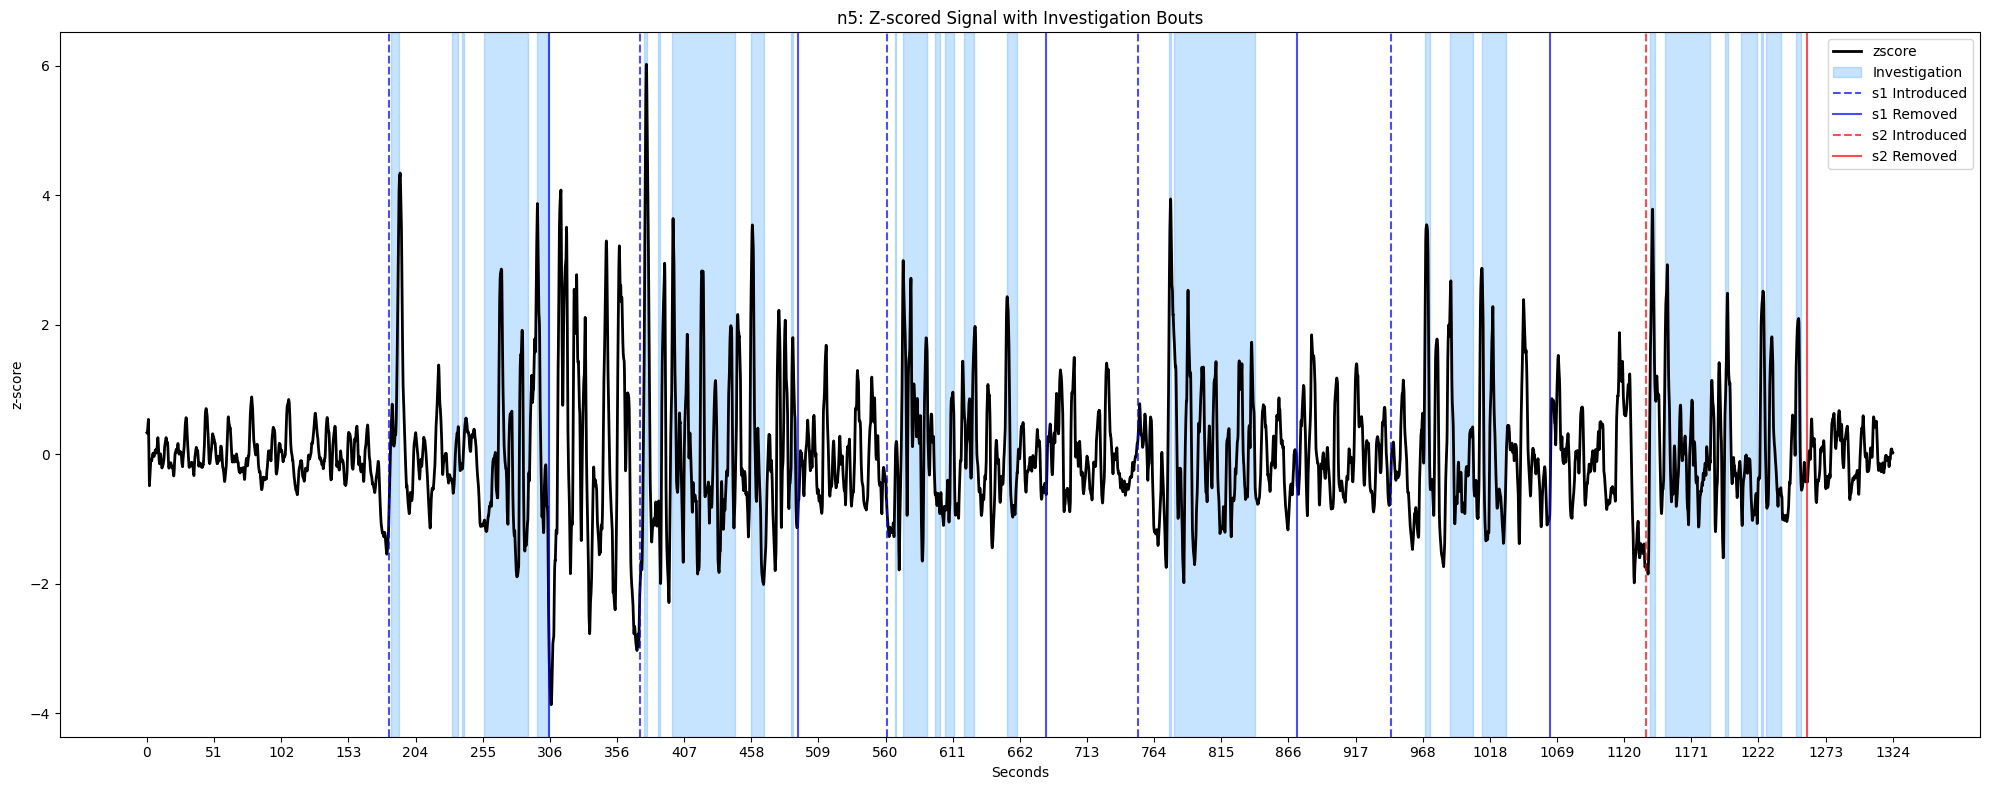

In [6]:
tdt_data_obj.hab_dishab_plot_behavior_event(plot_type='zscore', behavior_name='Investigation')

In [7]:
agents = ['long_term', 'short_term', 'novel', 'nothing']

df_total_durations = tdt_data_obj.sp_extract_total_behavior_durations(agents, behaviors=['sniff', 'chew'])

print(df_total_durations)

AttributeError: 'TDTData' object has no attribute 'sp_extract_total_behavior_durations'

## Plot Raw Trace

In [8]:
len(tdt_data_obj.streams['DA'])

772588

In [9]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

772588

In [10]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

742070

In [11]:
tdt_data_obj.remove_time_segment(90,130)

Removed time segment from 90s to 130s.


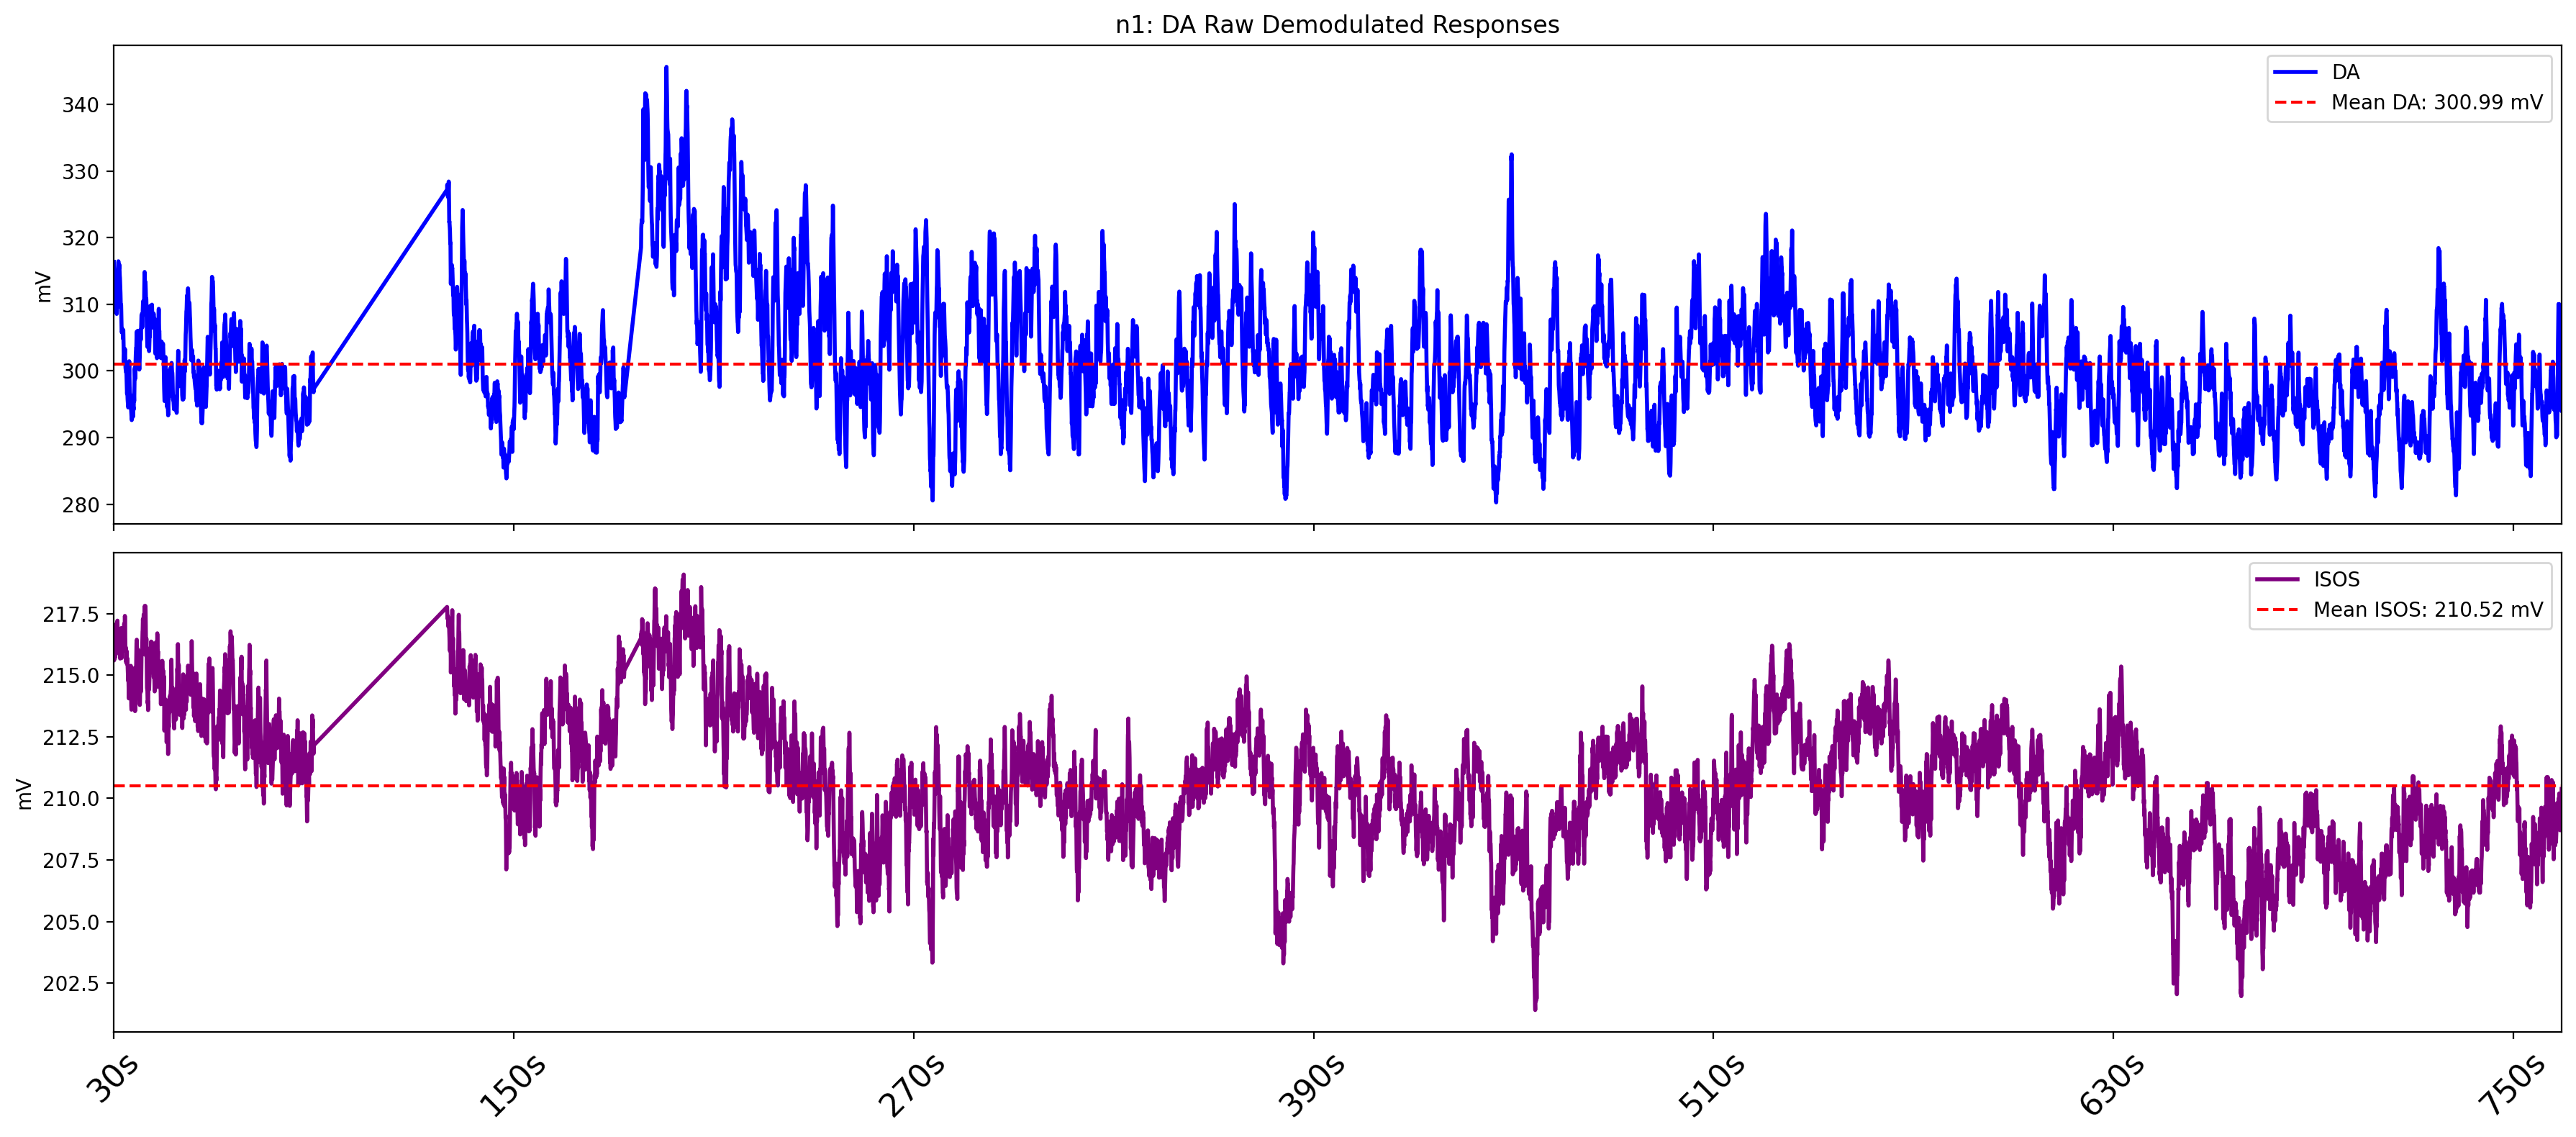

In [12]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [13]:
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*2)

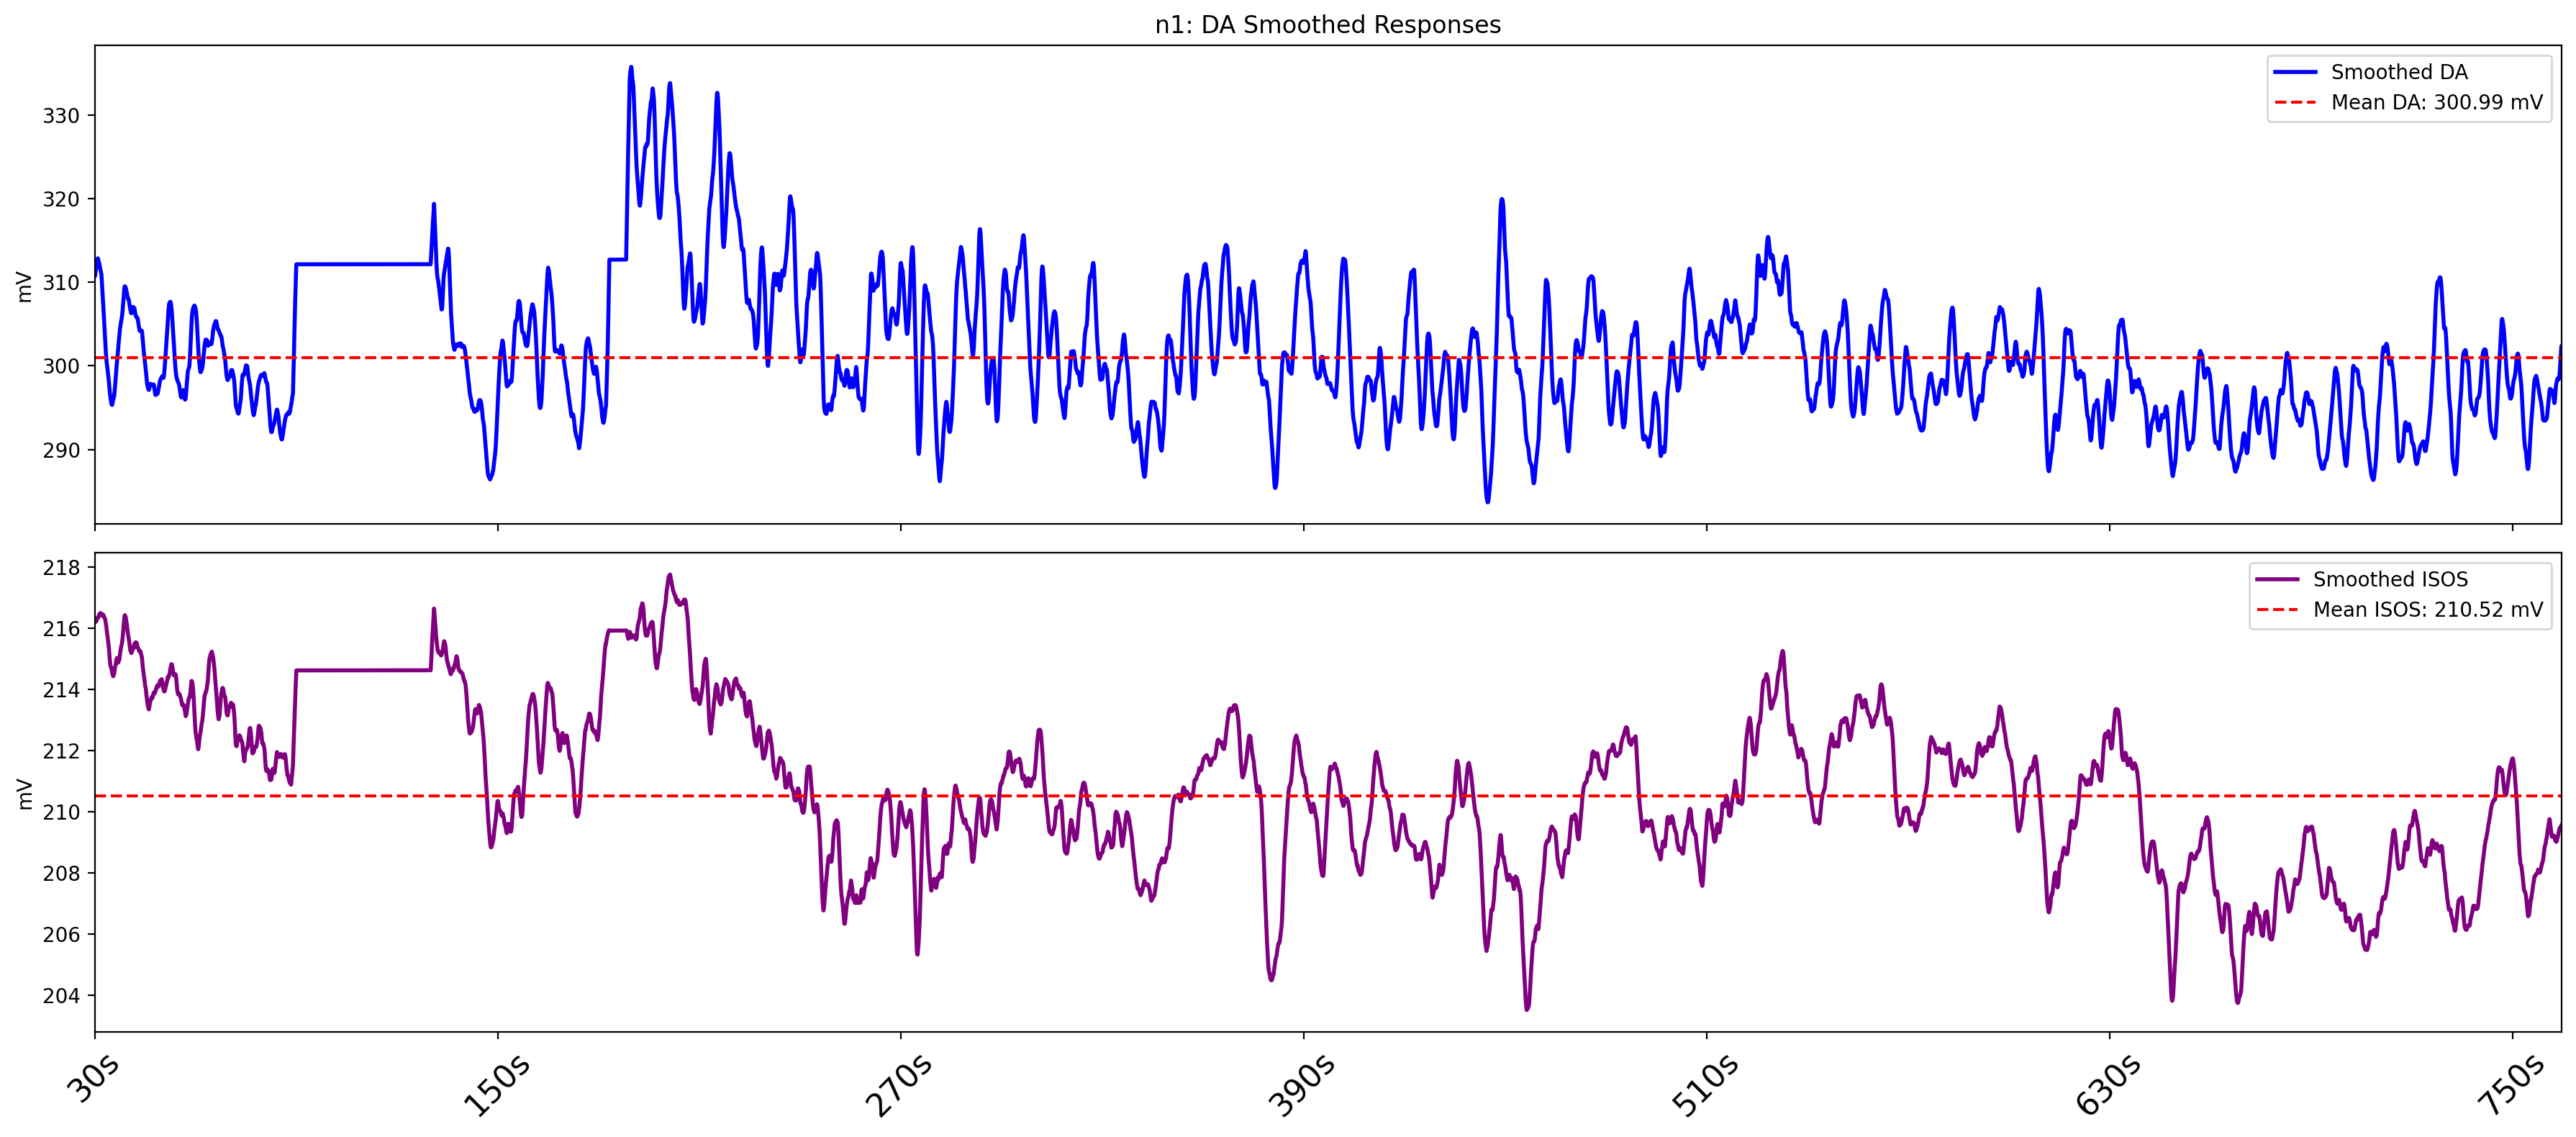

In [14]:
tdt_data_obj.plot_signal('smoothed')

In [15]:
# tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.apply_ma_baseline_correction()

In [16]:
tdt_data_obj.DA_fc

array([304.76902158, 304.76902133, 304.76902083, ..., 296.03382058,
       296.03382064, 296.03382064])

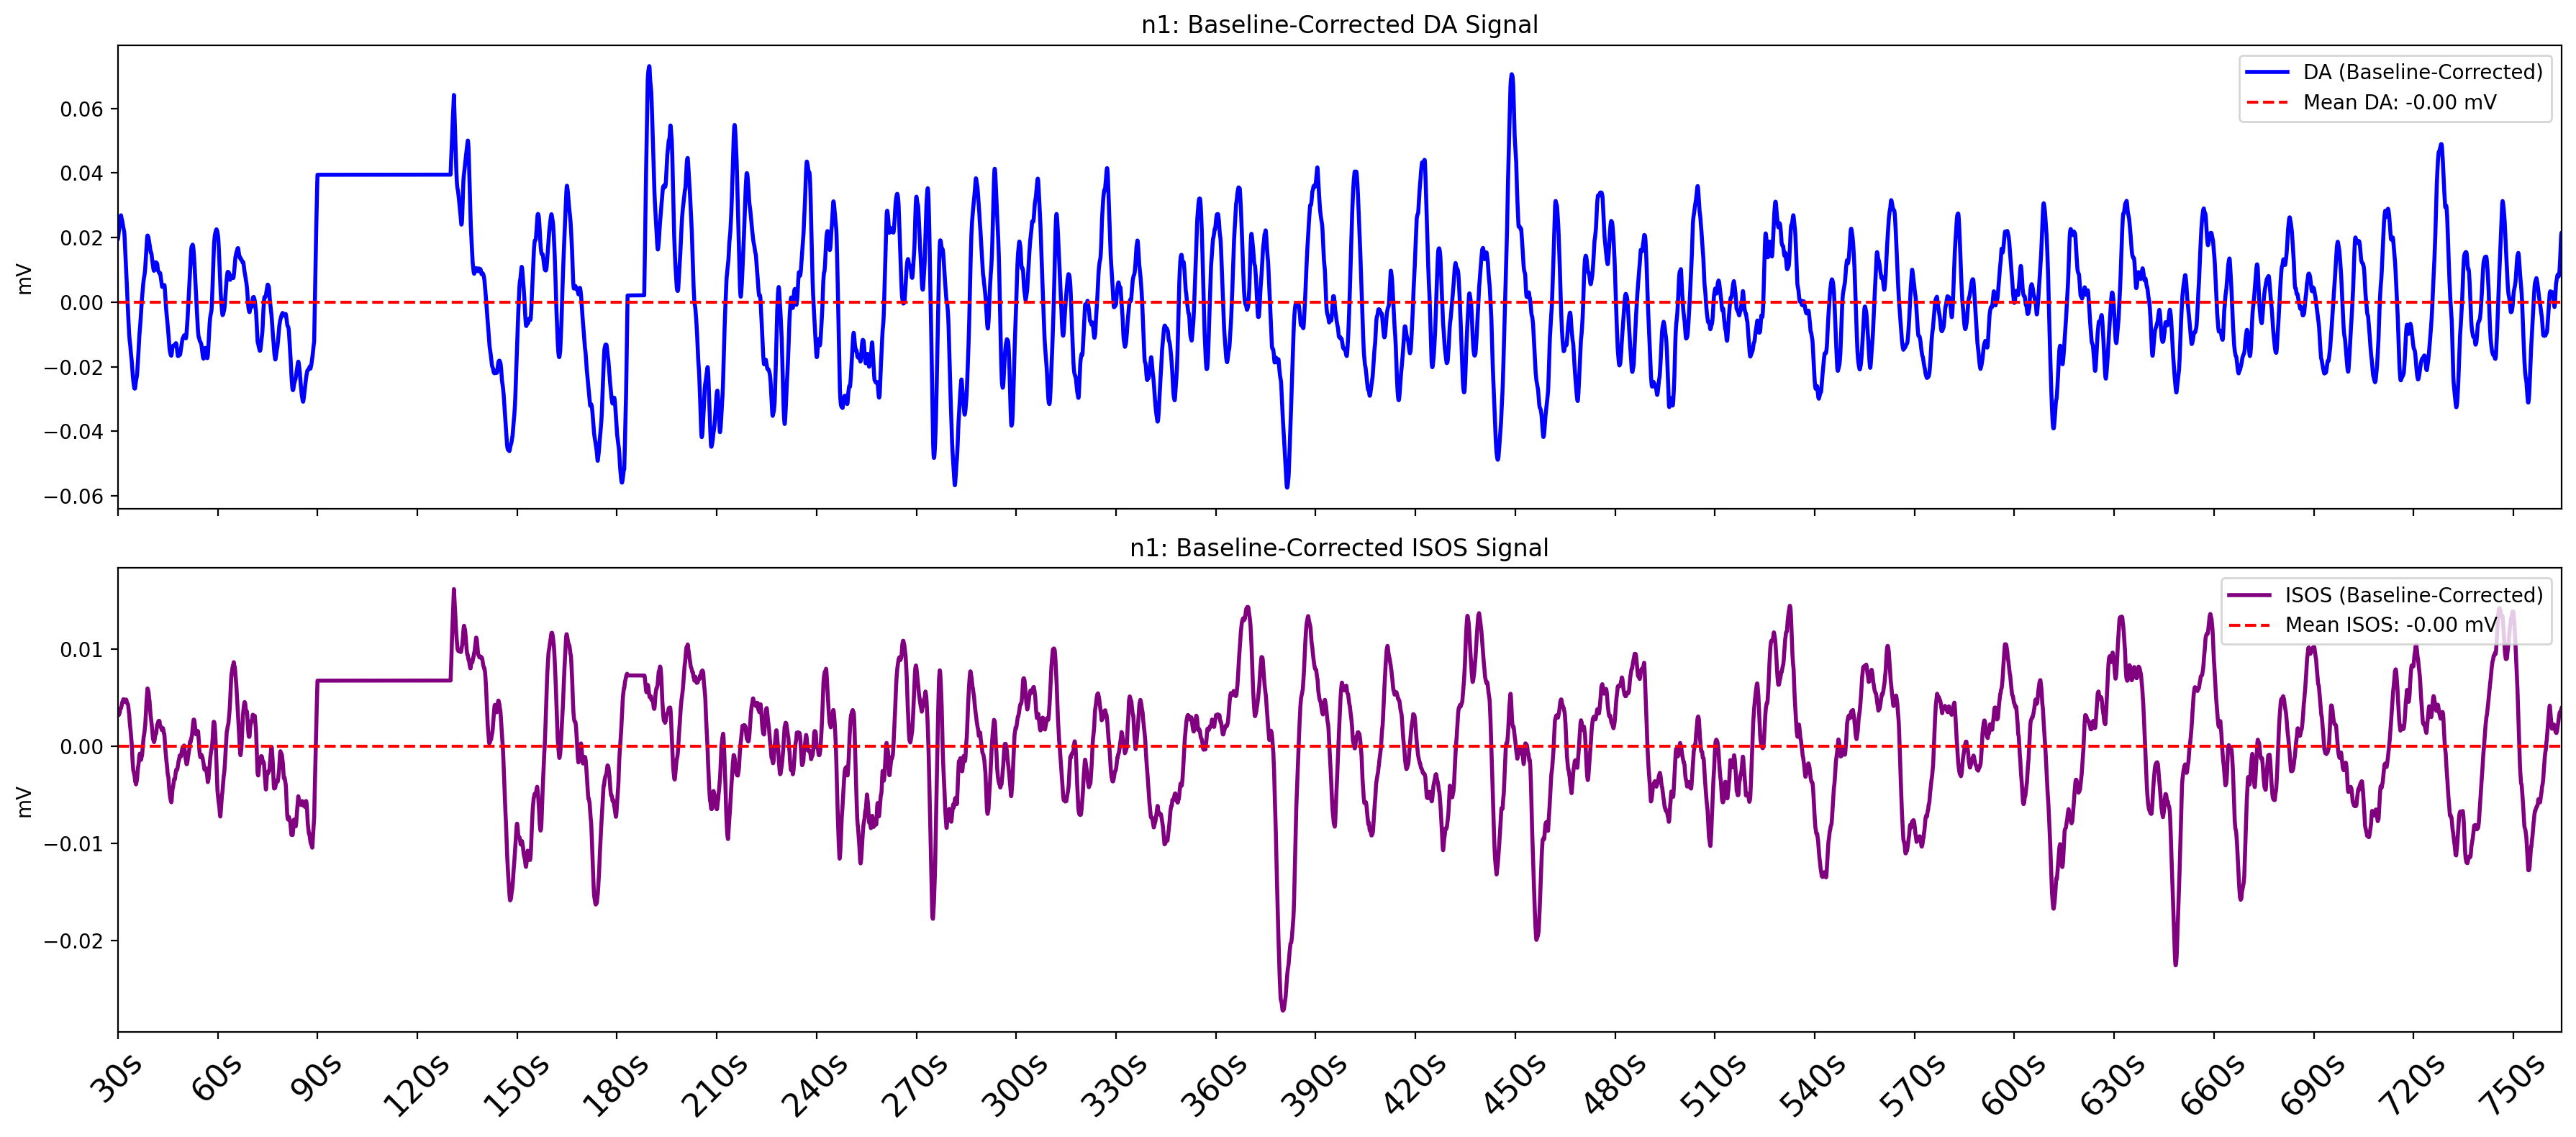

In [17]:
tdt_data_obj.plot_baseline_corrected_signal()

In [18]:
tdt_data_obj.perform_standardization()

In [19]:
tdt_data_obj.align_channels()

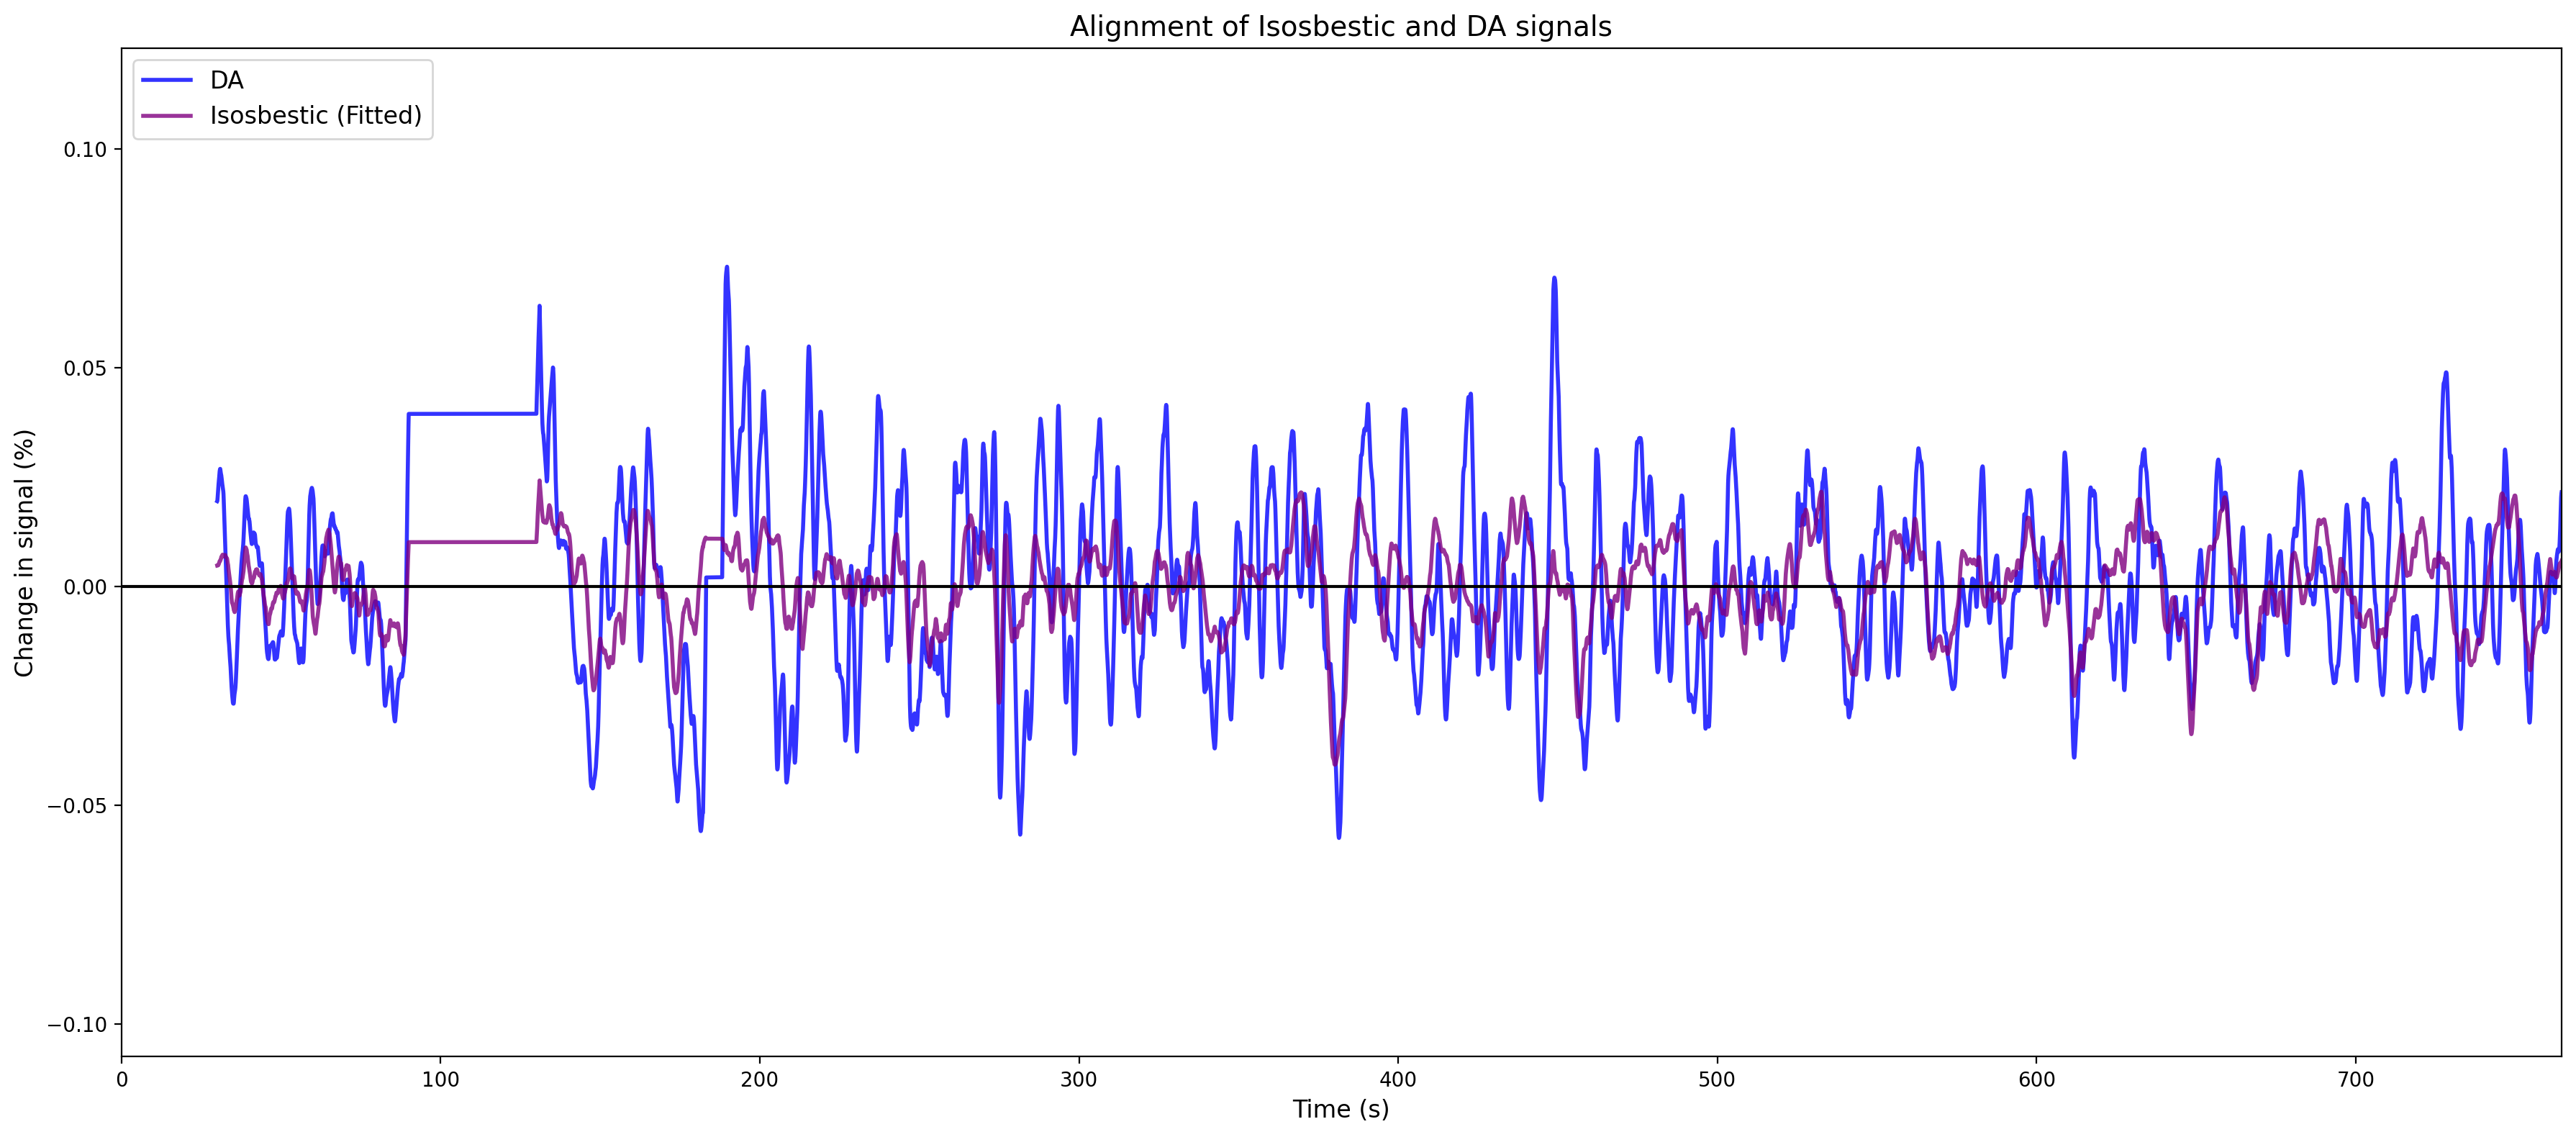

In [20]:
tdt_data_obj.plot_aligned_signals()

In [21]:
tdt_data_obj.compute_dFF()

array([0.01471062, 0.01471079, 0.01471112, ..., 0.01566585, 0.01566597,
       0.01566597])

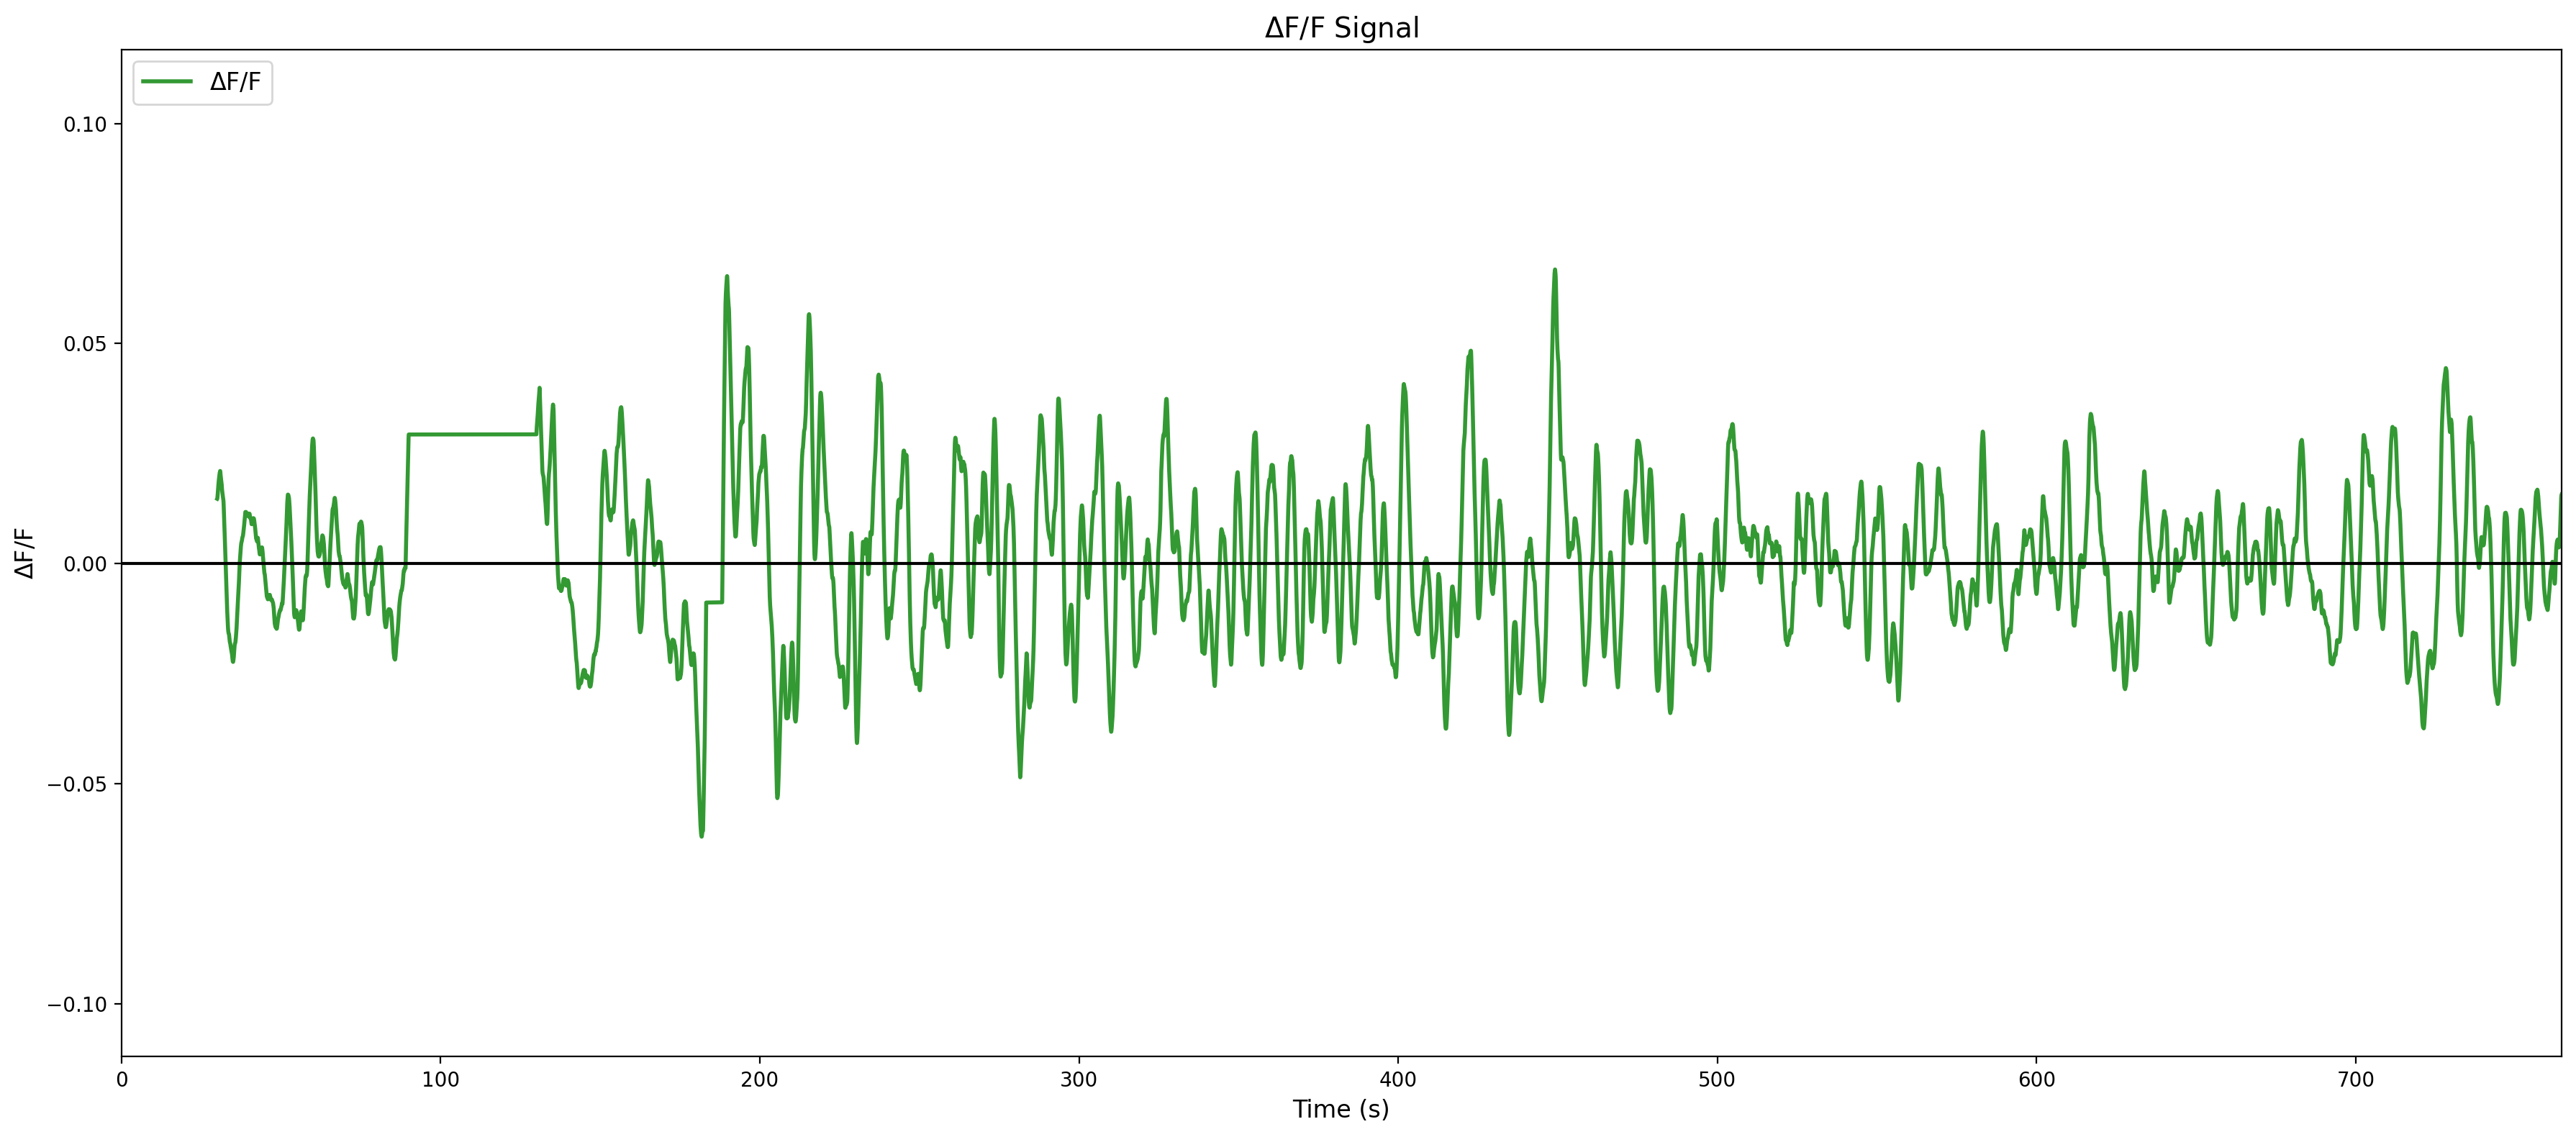

In [22]:
tdt_data_obj.plot_dFF()

In [23]:
tdt_data_obj.compute_zscore()

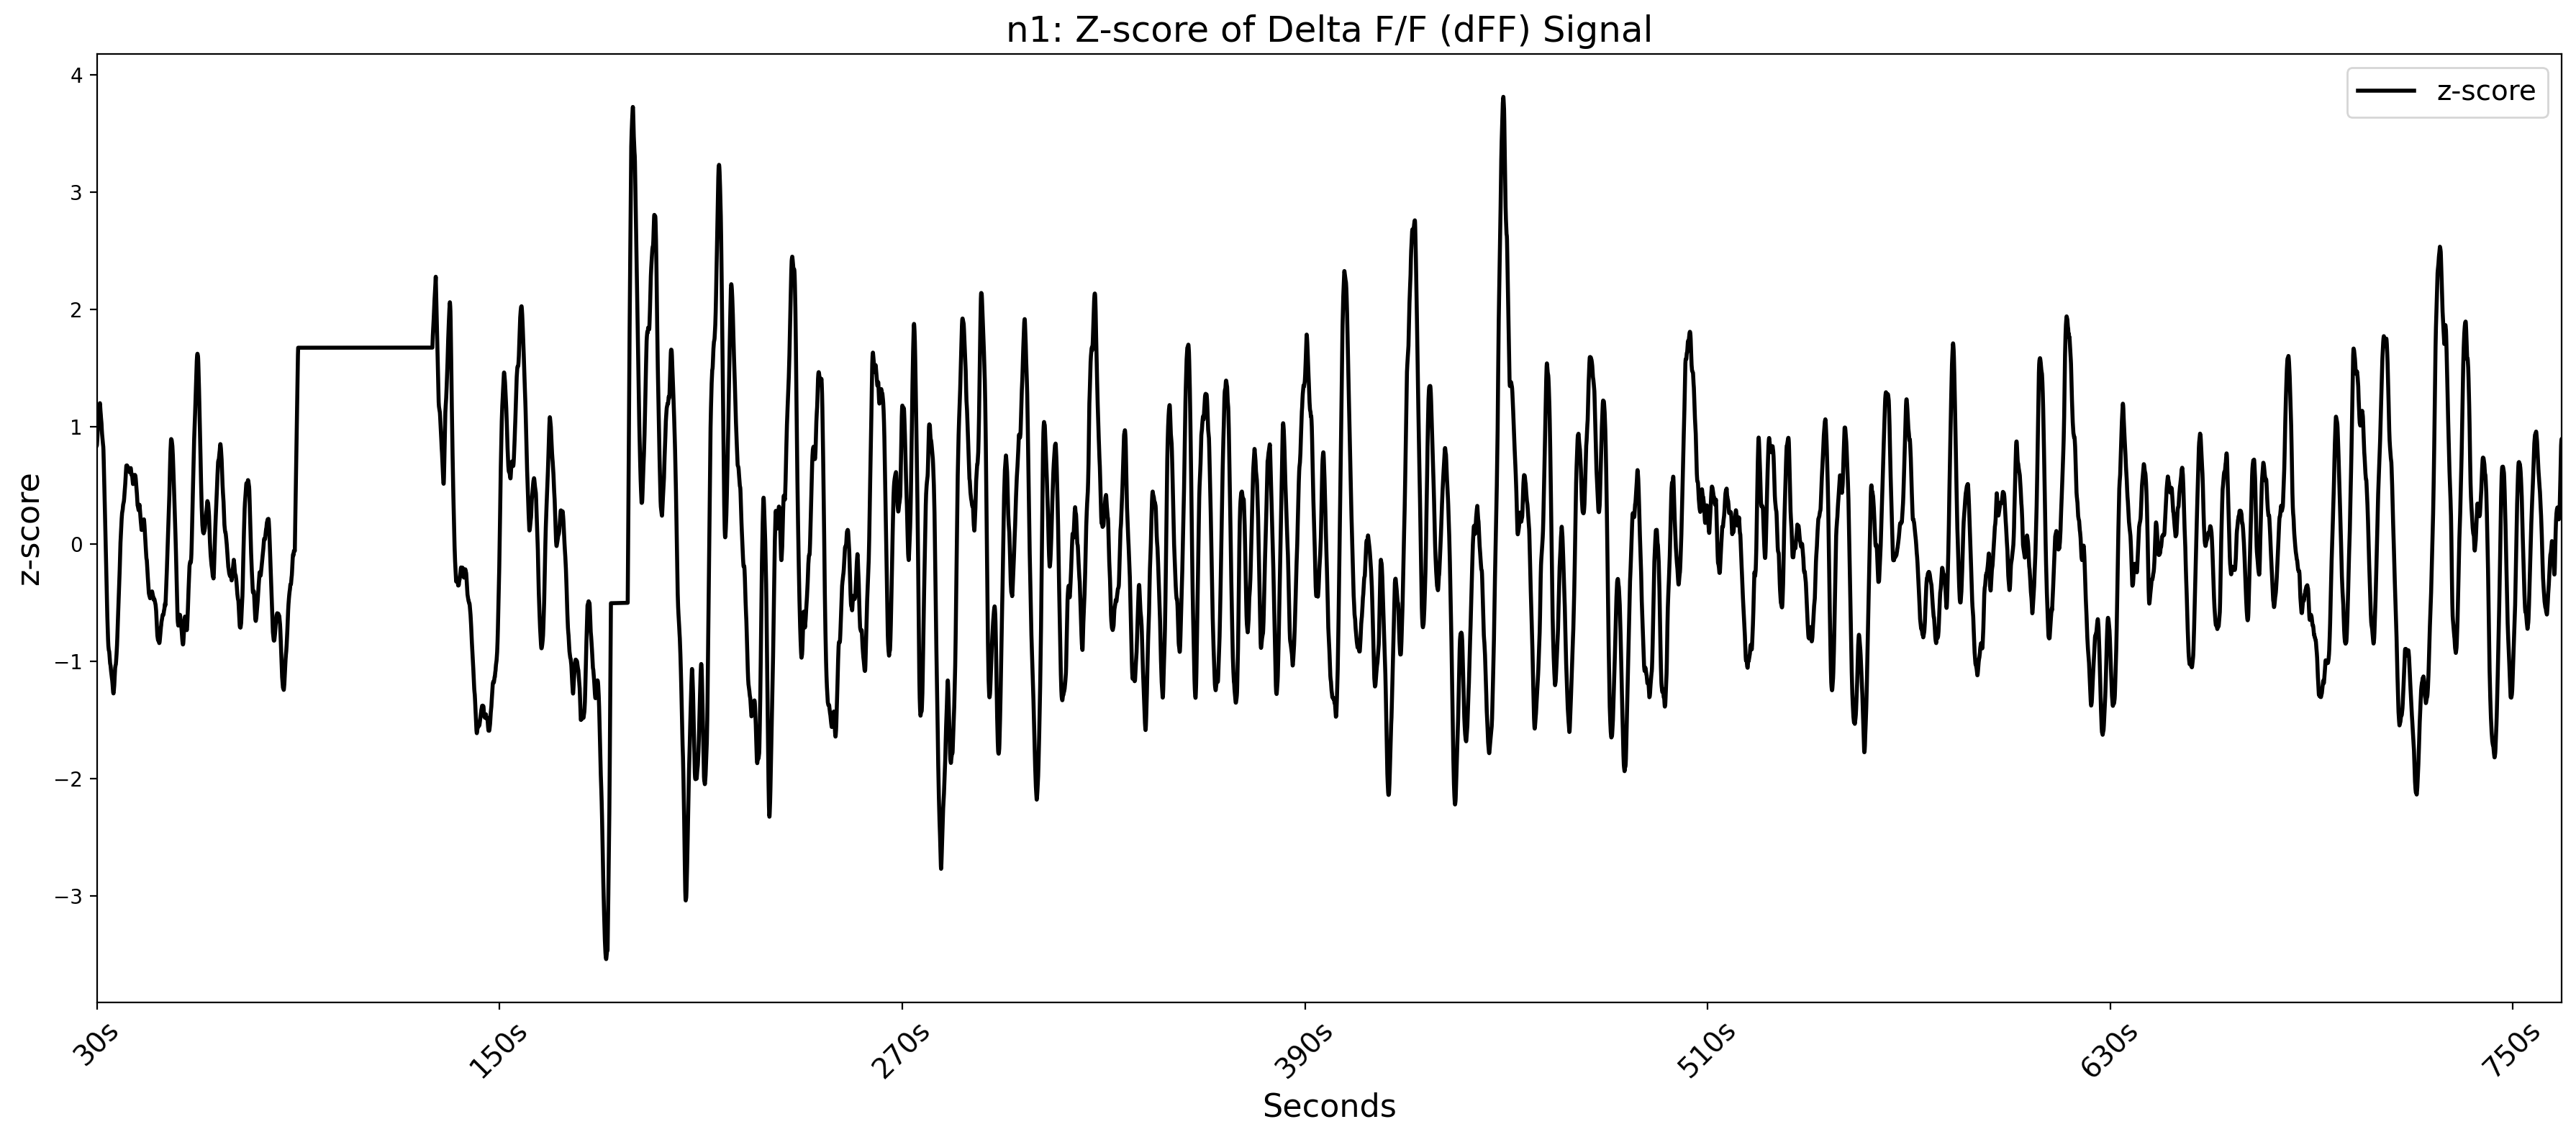

In [24]:
tdt_data_obj.plot_zscore()

## PETH

ValueError: Behavior event 'Investigation' not found in behaviors.

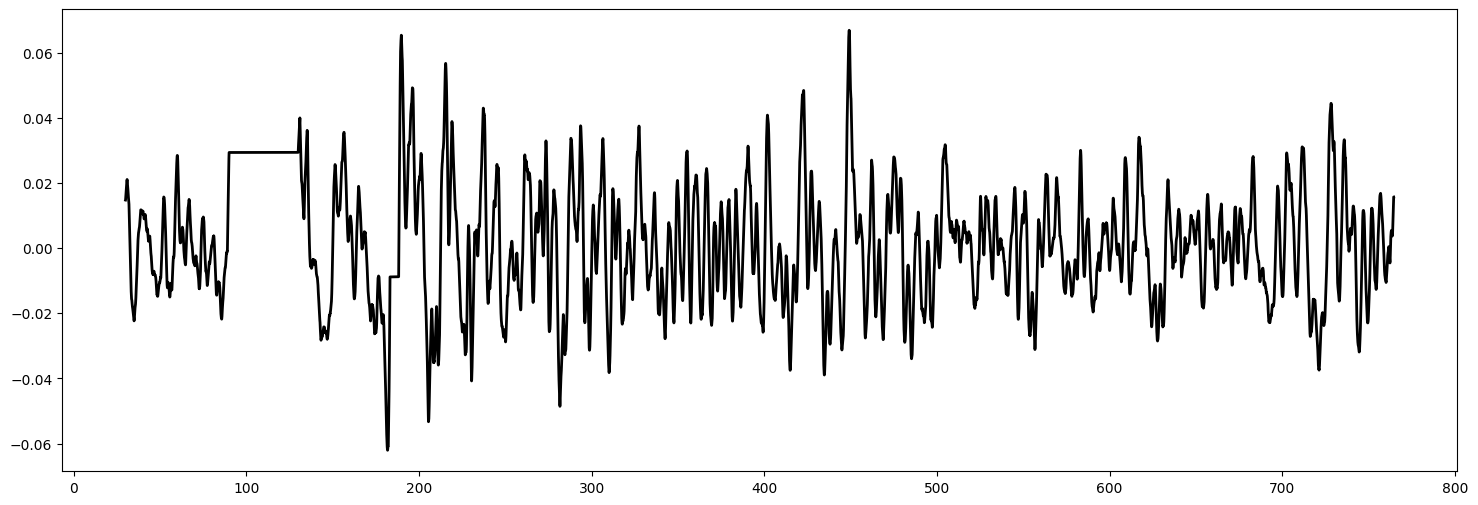

In [25]:
tdt_data_obj.plot_behavior_event(behavior_name='Investigation', plot_type='dFF')

In [22]:
tdt_data_obj.compute_first_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.05)

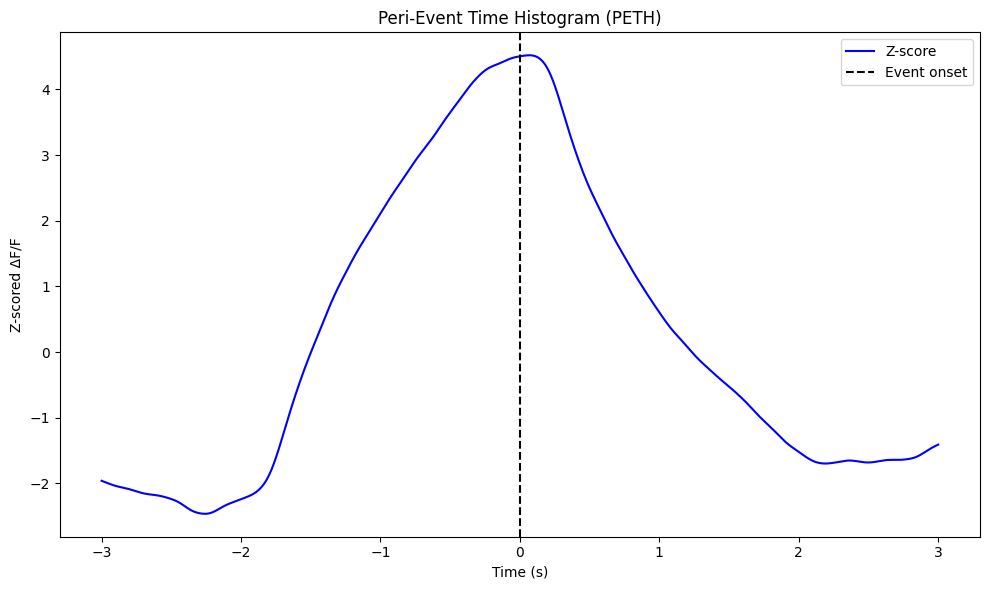

In [26]:
tdt_data_obj.plot_first_event_peth(signal_type='zscore')

In [27]:
tdt_data_obj.compute_1st_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.1)

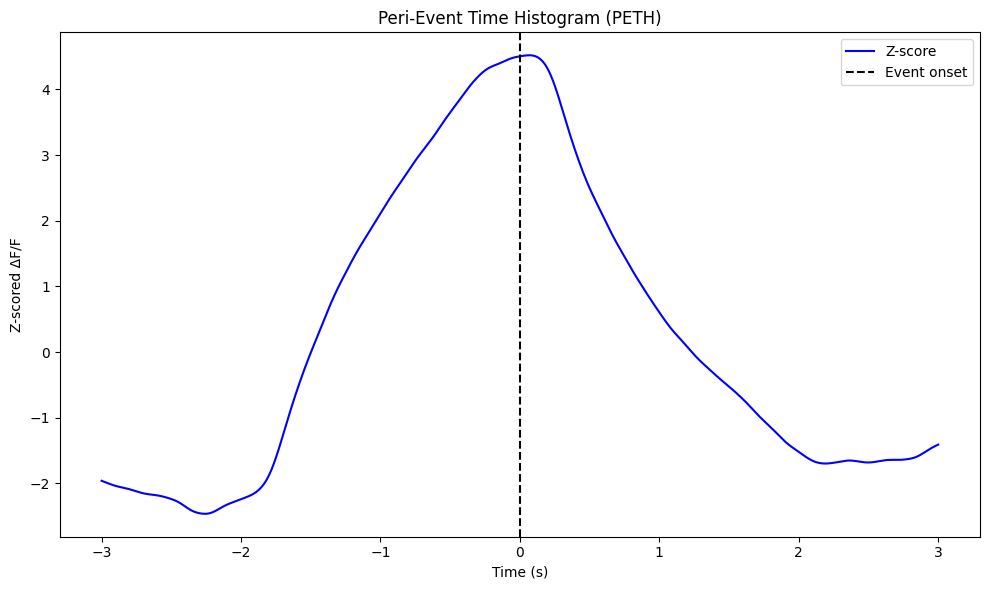

In [28]:
tdt_data_obj.plot_1st_event_peth(signal_type='zscore')

Old method

In [24]:
# # Downsample the data
# # tdt_data_obj.downsample_data(N = 16)

# # Compute dFF
# tdt_data_obj.compute_dff()
# tdt_data_obj.plot_signal('dFF')
# tdt_data_obj.compute_zscore()
# tdt_data_obj.print_behaviors()

## Mean DA during first of each behavior

In [25]:
# tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.smooth_signal()
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# # tdt_data_obj.hc_get_first_behavior()
# tdt_data_obj.bout_dict